In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
import math as m

# Processing EMG data for 2 TTAs
Finding the amount of co-contraction, and comparing the effect of having no feedback vs. having feedback

In [39]:
def normalise(signal1, signal2, MVC_M1_SCALED, MVC_M2_SCALED):
    ''' 
    A function that normalises the raw EMG signals for muscle 1 and 2
    outputs the normalised muscle contraction values for m1 and m2
    '''
    s1_normal = int(signal1/MVC_M1_SCALED *100)
    s2_normal = int(signal2/MVC_M2_SCALED *100)
    return s1_normal, s2_normal


def find_flex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during flexion
    '''
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg2[i] > emg1[i]:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y


def find_ex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during extension
    '''
    ex_x = []
    ex_y = []
    for i in range(len(emg2)):
        if emg1[i] > emg2[i]:
            ex_x.append(emg1[i])
            ex_y.append(emg2[i])
    return ex_x, ex_y

# TTA user, age: 35

open the files and save the EMG signals into lists

In [40]:
# MVC,142,MVC,195

MVC_M1 = 142
MVC_M2 = 195
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Markus_raw_nofeedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Markus_raw_feedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 5.4193282611154565, y axis flex: 0
slope ex: 0.2942777031052082, y axis ex: 0


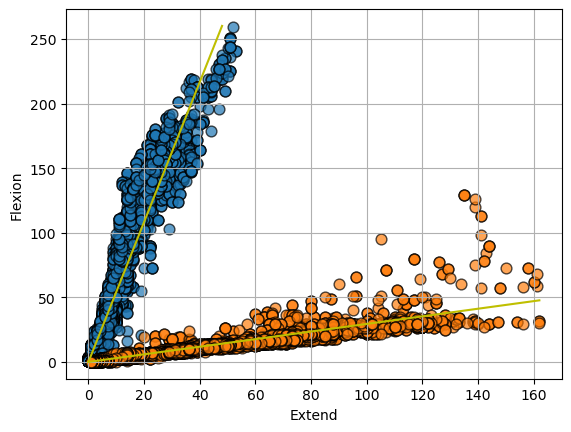

In [41]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


# need to filter extend, delete outliers
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 100 ):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])


# change lists to numpy array for the polyfit
# NO FB
sub1_flex_x = np.array(flex_x_filter)
sub1_flex_y = np.array(flex_y_filter)
sub1_ex_x = np.array(ex_x)
sub1_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub1_a, sub1_b = np.polyfit(sub1_flex_x, sub1_flex_y, 1)
sub1_b = 0
print(f"slope flex: {sub1_a}, y axis flex: {sub1_b}")
sub1_c, sub1_d = np.polyfit(sub1_ex_x, sub1_ex_y, 1)
sub1_d = 0
print(f"slope ex: {sub1_c}, y axis ex: {sub1_d}")


#add points to plot
plt.scatter(sub1_flex_x, sub1_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x,   sub1_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex = np.linspace(0, 48, num=100)
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex = np.linspace(0, max(sub1_ex_x), num=100)
plt.plot(sub1_xseq_ex, sub1_c*sub1_xseq_ex+sub1_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 5.555574425324487, feedback, y axis flex: 0
feedback, slope ex: 0.2633778396768348, feedback, y axis flex: 0


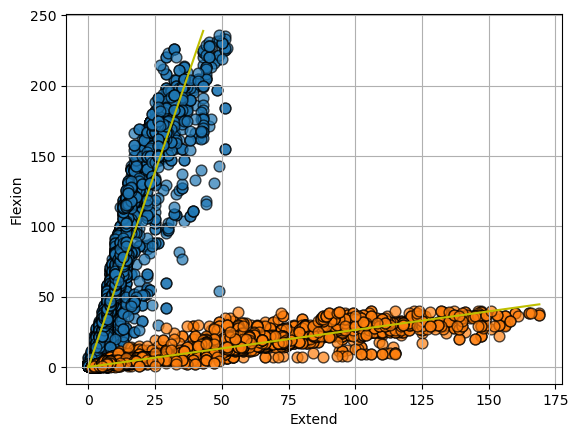

In [42]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)


# need to filter flex_feedback data, delete outliers flex_x_feed
flex_x_feed_filter = []
flex_y_feed_filter = []
for i in range(len(flex_x_feed)):
    if (flex_x_feed[i] > 52 and flex_y_feed[i] > 50):
        pass
    else:
        flex_x_feed_filter.append(flex_x_feed[i])
        flex_y_feed_filter.append(flex_y_feed[i])
# need to filter ex_feedback data, delete outliers ex_x_feed
ex_x_feed_filter = []
ex_y_feed_filter = []
for i in range(len(ex_x_feed)):
    if (ex_y_feed[i] > 40):
        pass
    else:
        ex_x_feed_filter.append(ex_x_feed[i])
        ex_y_feed_filter.append(ex_y_feed[i])
        

# WITH FB, create numpy arrays
sub1_flex_x_feed = np.array(flex_x_feed_filter)
sub1_flex_y_feed = np.array(flex_y_feed_filter)
sub1_ex_x_feed = np.array(ex_x_feed_filter)
sub1_ex_y_feed = np.array(ex_y_feed_filter)


# find line of best fit
# WITH FB
sub1_a_feed, sub1_b_feed = np.polyfit(sub1_flex_x_feed, sub1_flex_y_feed, 1)
sub1_b_feed = 0
print(f"feedback, slope flex: {sub1_a_feed}, feedback, y axis flex: {sub1_b_feed}")
sub1_c_feed, sub1_d_feed = np.polyfit(sub1_ex_x_feed, sub1_ex_y_feed, 1)
sub1_d_feed = 0
print(f"feedback, slope ex: {sub1_c_feed}, feedback, y axis flex: {sub1_d_feed}")

plt.scatter(sub1_flex_x_feed, sub1_flex_y_feed, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x_feed, sub1_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex_feed = np.linspace(0, 43, num=100)
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex_feed = np.linspace(0, max(sub1_ex_x_feed), num=100)
plt.plot(sub1_xseq_ex_feed, sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

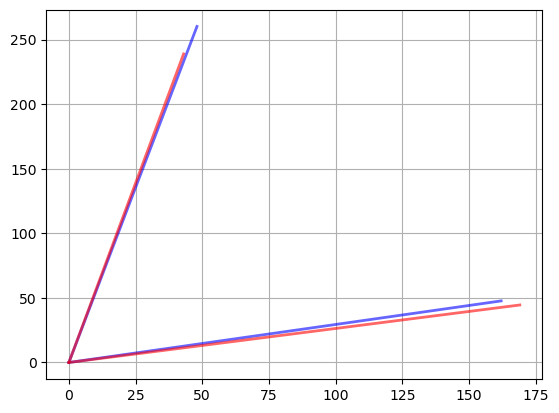

In [43]:

# Subject 1
# without feedback
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# with feedback
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

plt.grid()
plt.show() 

# TTA user 2, age: 57

In [44]:
# MVC,231,MVC,231

MVC_M1 = 231
MVC_M2 = 231
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Gummi_raw_nofeedback_minus2rst.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Gummi_raw_feedback_minus2rst.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 3.3226435755468975, y axis flex: 0
slope ex: 0.45574839483431573, y axis ex: 0


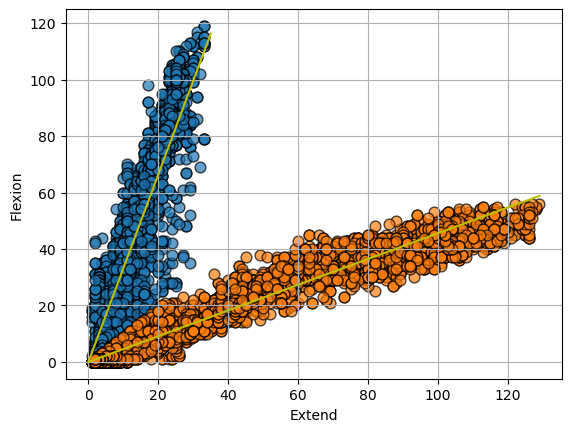

In [45]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)
ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)


flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] < 20 and flex_y[i] >= 100):
        pass
    elif (flex_x[i] > 20 and flex_y[i] > 150):
        pass
    elif (flex_x[i] <= 9 and flex_y[i] > 60):
        pass
    elif (flex_x[i] < 5 and flex_y[i] > 45):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub2_flex_x = np.array(flex_x_filter)
sub2_flex_y = np.array(flex_y_filter)
sub2_ex_x = np.array(ex_x)
sub2_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub2_a, sub2_b = np.polyfit(sub2_flex_x, sub2_flex_y, 1)
sub2_b = 0
print(f"slope flex: {sub2_a}, y axis flex: {sub2_b}")
sub2_c, sub2_d = np.polyfit(sub2_ex_x, sub2_ex_y, 1)
sub2_d = 0
print(f"slope ex: {sub2_c}, y axis ex: {sub2_d}")


#add points to plot
plt.scatter(sub2_flex_x, sub2_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x,   sub2_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex = np.linspace(0, 35, num=100)
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex = np.linspace(0, max(sub2_ex_x), num=100)
plt.plot(sub2_xseq_ex, sub2_c*sub2_xseq_ex+sub2_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 3.5815465598471117, feedback, y axis flex: 0
feedback, slope ex: 0.4759231093067134, feedback, y axis flex: 0


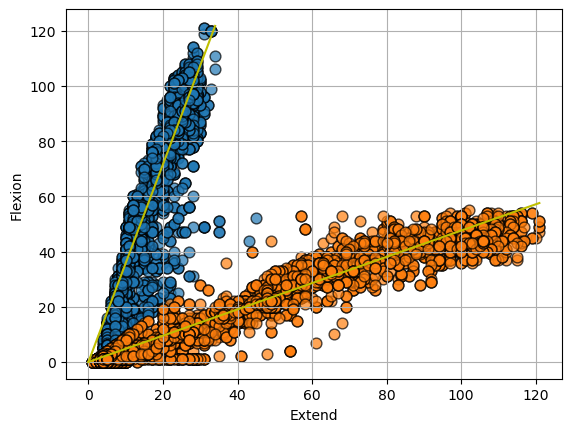

In [46]:
# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_norm_feed, emg2_norm_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_norm_feed, emg2_norm_feed)


# WITH FB, create numpy arrays
sub2_flex_x_feed = np.array(flex_x_feed)
sub2_flex_y_feed = np.array(flex_y_feed)
sub2_ex_x_feed = np.array(ex_x_feed)
sub2_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub2_a_feed, sub2_b_feed = np.polyfit(sub2_flex_x_feed, sub2_flex_y_feed, 1)
sub2_b_feed = 0
print(f"feedback, slope flex: {sub2_a_feed}, feedback, y axis flex: {sub2_b_feed}")
sub2_c_feed, sub2_d_feed = np.polyfit(sub2_ex_x_feed, sub2_ex_y_feed, 1)
sub2_d_feed = 0
print(f"feedback, slope ex: {sub2_c_feed}, feedback, y axis flex: {sub2_d_feed}")

plt.scatter(sub2_flex_x_feed, sub2_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x_feed,   sub2_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex_feed = np.linspace(0, 34, num=100)
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex_feed = np.linspace(0, max(sub2_ex_x_feed), num=100)
plt.plot(sub2_xseq_ex_feed, sub2_c_feed*sub2_xseq_ex_feed+sub2_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

----- TTA: 1 ------
Flexion degree for TTA: 1 = 10.45
Extension degree for TTA: 1 = 16.4
Flexion degree for TTA: 1 with FB= 10.2
Extension degree for TTA: 1 with FB= 14.76
----- TTA: 2 ------
Flexion degree for TTA: 2 = 16.75
Extension degree for TTA: 2 = 24.5
Flexion degree for TTA: 2 with FB= 15.6
Extension degree for TTA: 2 with FB= 25.45


C:\Users\irfridriksdottir\AppData\Local\Temp\ipykernel_35164\4289803419.py:79: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['TTA:1', '_None', 'TTA:1 FB', '_None', 'TTA:2', '_None', 'TTA:2 FB', '_None'], loc= "upper right")


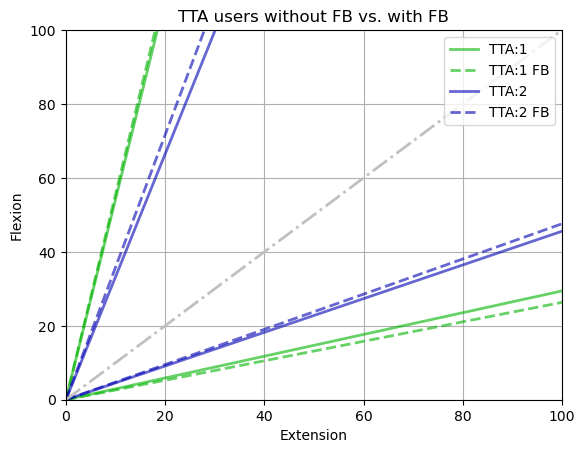

In [47]:
# Subject 1
print("----- TTA: 1 ------")
# ------------ without feedback -------------
plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color=(0, 0.7, 0),  alpha = 0.6, linewidth = 2)
sub1_flex_deg_x =  sub1_xseq_flex
sub1_flex_deg_y =  sub1_a*sub1_xseq_flex+sub1_b
sub1_flex_deg = m.degrees(m.atan(sub1_flex_deg_x[80]/sub1_flex_deg_y[80]))
sub1_flex_deg = round(sub1_flex_deg,2)
print(f"Flexion degree for TTA: 1 = {sub1_flex_deg}")


plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color=(0, 0.7, 0) , alpha = 0.6, linewidth = 2)
sub1_ex_deg_x =  sub1_xseq_ex
sub1_ex_deg_y =  sub1_c*sub1_xseq_ex  +sub1_d
sub1_ex_deg = m.degrees(m.atan(sub1_ex_deg_y[80]/sub1_ex_deg_x[80]))
sub1_ex_deg = round(sub1_ex_deg,2)
print(f"Extension degree for TTA: 1 = {sub1_ex_deg}")

# ------------ with feedback ------------
plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub1_flex_deg_x =  sub1_xseq_flex_feed
sub1_flex_deg_y =  sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed
sub1_flex_deg_fb = m.degrees(m.atan(sub1_flex_deg_x[80]/sub1_flex_deg_y[80]))
sub1_flex_deg_fb = round(sub1_flex_deg_fb,2)
print(f"Flexion degree for TTA: 1 with FB= {sub1_flex_deg_fb}")



plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub1_ex_deg_x =  sub1_xseq_ex_feed
sub1_ex_deg_y =  sub1_c_feed*sub1_xseq_ex_feed  +sub1_d_feed
sub1_ex_deg_fb = m.degrees(m.atan(sub1_ex_deg_y[80]/sub1_ex_deg_x[80]))
sub1_ex_deg_fb = round(sub1_ex_deg_fb,2)
print(f"Extension degree for TTA: 1 with FB= {sub1_ex_deg_fb}")

# Subject 2
print("----- TTA: 2 ------")
# ------------ without feedback -------------
plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color=(0, 0, 0.7),  alpha = 0.6, linewidth = 2)
sub2_flex_deg_x =  sub2_xseq_flex
sub2_flex_deg_y =  sub2_a*sub2_xseq_flex+sub2_b
sub2_flex_deg = m.degrees(m.atan(sub2_flex_deg_x[80]/sub2_flex_deg_y[80]))
sub2_flex_deg = round(sub2_flex_deg,2)
print(f"Flexion degree for TTA: 2 = {sub2_flex_deg}")

plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color=(0, 0, 0.7) , alpha = 0.6, linewidth = 2)
sub2_ex_deg_x =  sub2_xseq_ex
sub2_ex_deg_y =  sub2_c*sub2_xseq_ex  +sub2_d
sub2_ex_deg = m.degrees(m.atan(sub2_ex_deg_y[80]/sub2_ex_deg_x[80]))
sub2_ex_deg = round(sub2_ex_deg,2)
print(f"Extension degree for TTA: 2 = {sub2_ex_deg}")
# ------------ with feedback ------------
plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub2_flex_deg_x =  sub2_xseq_flex_feed
sub2_flex_deg_y =  sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed
sub2_flex_deg_fb = m.degrees(m.atan(sub2_flex_deg_x[80]/sub2_flex_deg_y[80]))
sub2_flex_deg_fb = round(sub2_flex_deg_fb,2)
print(f"Flexion degree for TTA: 2 with FB= {sub2_flex_deg_fb}")

plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
sub2_ex_deg_x =  sub2_xseq_ex_feed
sub2_ex_deg_y =  sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed
sub2_ex_deg_fb = m.degrees(m.atan(sub2_ex_deg_y[80]/sub2_ex_deg_x[80]))
# use only with first 2 digits
sub2_ex_deg_fb = round(sub2_ex_deg_fb,2)
print(f"Extension degree for TTA: 2 with FB= {sub2_ex_deg_fb}")

# plot a dashed line in the middle
grey_line_x = [0 , 50 , 100]
grey_line_y = [0 , 50 , 100]
plt.plot(grey_line_x, grey_line_y, "-.", color = "silver", linewidth = 2)

plt.grid()
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('TTA users without FB vs. with FB')
plt.xlabel('Extension')
plt.ylabel('Flexion')
plt.legend(['TTA:1', '_None', 'TTA:1 FB', '_None', 'TTA:2', '_None', 'TTA:2 FB', '_None'], loc= "upper right") 
plt.show() 

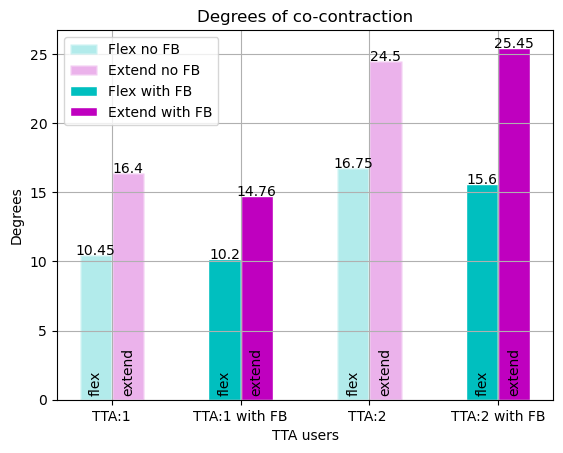

In [48]:
# red = decrease in co-contraction, green = increase in co-contraction
# flexion for TTA1 and TTA2 no FB
flex_1_2 = [sub1_flex_deg, sub2_flex_deg]
# Extension for TTA1 and TTA2 no FB
ex_1_2 = [sub1_ex_deg, sub2_ex_deg]
# flexion for TTA1 and TTA2 with FB
flex_1_2_feed = [sub1_flex_deg_fb, sub2_flex_deg_fb]
# Extension for TTA1 and TTA2 with FB
ex_1_2_feed = [sub1_ex_deg_fb, sub2_ex_deg_fb]



subject_list = ["TTA:1", "TTA:1 with FB", "TTA:2 ", "TTA:2 with FB"]


# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], list[i], ha = 'center')


width = 0.25

r = [1,2,3,4]

r_flex = [1,3]
r_ex = [x + width for x in r_flex]



r_flex_feed = [2,4]
r_ex_feed = [x + width for x in r_flex_feed]

r_middle = [x + 0.5*width for x in r]

plt.bar(r_flex, flex_1_2, color = "c", alpha = 0.3,  width = width, edgecolor = 'white', linewidth = 2, label="Flex no FB")
plt.bar(r_ex, ex_1_2, color = "m",     alpha = 0.3,   width = width, edgecolor = 'white', linewidth = 2, label = "Extend no FB")


plt.bar(r_flex_feed, flex_1_2_feed , color = "c",    width = width, edgecolor = 'white', label = "Flex with FB")
plt.bar(r_ex_feed, ex_1_2_feed ,     color = "m",    width = width, edgecolor = 'white', label = "Extend with FB")

addlabel_flex(r_flex, flex_1_2)
addlabel_flex(r_flex_feed, flex_1_2_feed)

addlabel_ex(r_ex, ex_1_2)
addlabel_ex(r_ex_feed, ex_1_2)

addvalue(r_flex, flex_1_2)
addvalue(r_flex_feed, flex_1_2_feed)
addvalue(r_ex, ex_1_2)
addvalue(r_ex_feed, ex_1_2_feed)


plt.xlabel("TTA users") 
plt.ylabel("Degrees")  
plt.xticks(r_middle ,subject_list) 

# plt.ylim(0,20)
plt.legend(loc = "upper left")
plt.title("Degrees of co-contraction")
plt.grid()
plt.show()

delta flex and delta ex comparing values with no FB vs with FB

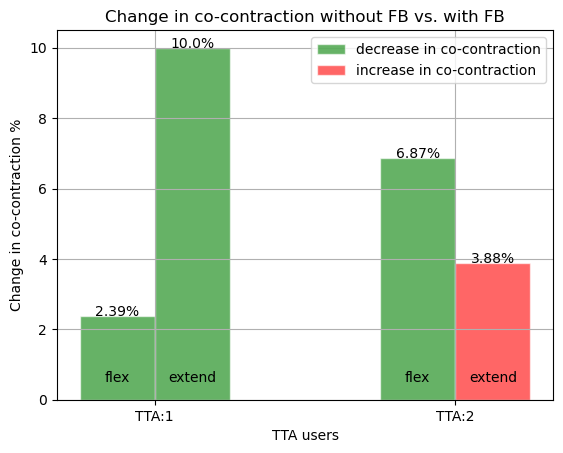

In [49]:
# minus = decrease in co-contraction, plus = increase in co-contraction
# TTA 1
delta_flex_TTA1 = [round((sub1_flex_deg - sub1_flex_deg_fb)/sub1_flex_deg*100,2)] #green
delta_ex_TTA1 = [round((sub1_ex_deg - sub1_ex_deg_fb)/sub1_ex_deg*100,2)] #green
# TTA 2
delta_flex_TTA2 = [round((sub2_flex_deg - sub2_flex_deg_fb)/sub2_flex_deg*100,2)] #green
delta_ex_TTA2 = [round((sub2_ex_deg - sub2_ex_deg_fb)/sub2_ex_deg*100*-1,2)] #red

subject_list = ["TTA:1", "TTA:2"]
width = 0.25

# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 0)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 0)


def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], f"{list[i]}%", ha = 'center')

r_1 = [1,2]

r1_flex_TTA1 = [1]
r1_flex_TTA2 = [2]

r2_ex_TTA1 = [1+width]
r2_ex_TTA2 = [2+width]

r_middle = [x + 0.5*width for x in r_1]
r_2 = [x + width for x in r_1]

plt.bar(r1_flex_TTA1, delta_flex_TTA1, color = 'g', alpha=0.6, width = width, edgecolor = 'white', label= "_None")
plt.bar(r1_flex_TTA2, delta_flex_TTA2, color = 'g',alpha=0.6 ,width = width, edgecolor = 'white',label= "_None")

plt.bar(r2_ex_TTA1, delta_ex_TTA1 , color = 'g',alpha = 0.6, width = width, edgecolor = 'white', label= "decrease in co-contraction")
plt.bar(r2_ex_TTA2, delta_ex_TTA2 , color = 'r',alpha = 0.6, width = width, edgecolor = 'white', label="increase in co-contraction")

addlabel_flex(r1_flex_TTA1,delta_flex_TTA1)
addlabel_flex(r1_flex_TTA2,delta_flex_TTA2)
addlabel_ex(r2_ex_TTA1,delta_ex_TTA1)
addlabel_ex(r2_ex_TTA2,delta_ex_TTA2)

addvalue(r1_flex_TTA1,delta_flex_TTA1)
addvalue(r1_flex_TTA2,delta_flex_TTA2)
addvalue(r2_ex_TTA1,delta_ex_TTA1)
addvalue(r2_ex_TTA2,delta_ex_TTA2)

plt.xlabel("TTA users") 
plt.ylabel("Change in co-contraction %") 
plt.xticks(r_middle ,subject_list) 
plt.title("Change in co-contraction without FB vs. with FB")
plt.legend()

plt.grid()
plt.show()